In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


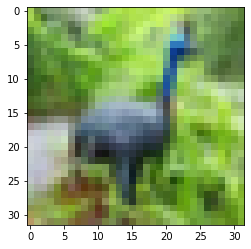

In [6]:
plt.imshow(x_train[6]);

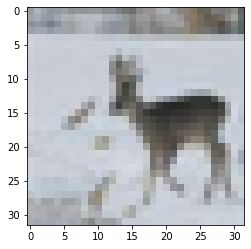

In [9]:
plt.imshow(x_train[20]);

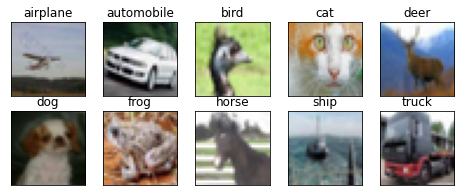

In [10]:
class_names=['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes=10

fig=plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    im=(features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [11]:
x_train=x_train/250
x_test=x_test/250

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train=to_categorical(y_train,10)

In [14]:
y_cat_test=to_categorical(y_test,10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [20]:
model.fit(x_train, y_cat_train, validation_data = (x_test, y_cat_test), epochs = 20, callbacks = [early_stop])

Epoch 1/20
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4837 - accuracy: 0.4590 - val_loss: 1.2030 - val_accuracy: 0.5714
Epoch 2/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1004 - accuracy: 0.6092 - val_loss: 1.0362 - val_accuracy: 0.6435
Epoch 3/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9038 - accuracy: 0.6825 - val_loss: 0.9653 - val_accuracy: 0.6712
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7616 - accuracy: 0.7346 - val_loss: 0.9807 - val_accuracy: 0.6679
Epoch 5/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6328 - accuracy: 0.7782 - val_loss: 0.9769 - val_accuracy: 0.6869


In [21]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.483656,0.45902,1.203027,0.5714
1,1.100366,0.60918,1.036207,0.6435
2,0.903755,0.68252,0.965268,0.6712
3,0.761573,0.73456,0.980702,0.6679
4,0.632795,0.77820,0.976920,0.6869


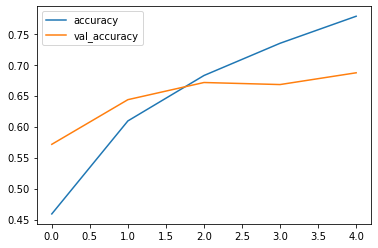

In [22]:
metrics[["accuracy", "val_accuracy"]].plot();